In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima.model import ARIMA


In [5]:
df = pd.read_csv("Advertising.csv")

In [6]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [7]:
model = ARIMA(train['Sales'], order=(5,1,0))
model_fit = model.fit()

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  160
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -493.502
Date:                Thu, 20 Feb 2025   AIC                            999.005
Time:                        14:02:10   BIC                           1017.418
Sample:                             0   HQIC                          1006.482
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8784      0.088     -9.948      0.000      -1.051      -0.705
ar.L2         -0.8096      0.102     -7.971      0.000      -1.009      -0.611
ar.L3         -0.5749      0.106     -5.448      0.0

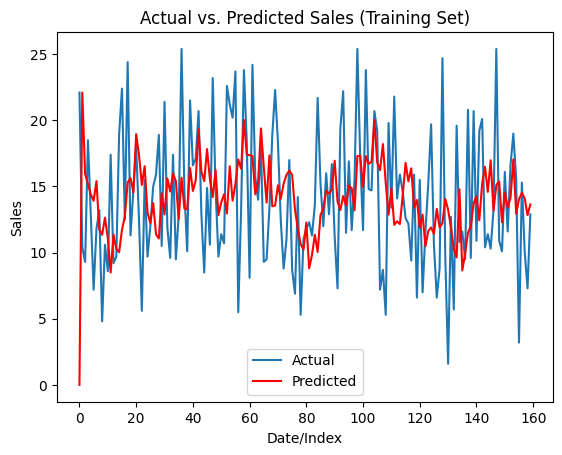

In [9]:
plt.plot(train.index, train['Sales'], label='Actual')
plt.plot(train.index, model_fit.fittedvalues, color='red', label='Predicted')
plt.title('Actual vs. Predicted Sales (Training Set)')
plt.xlabel('Date/Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


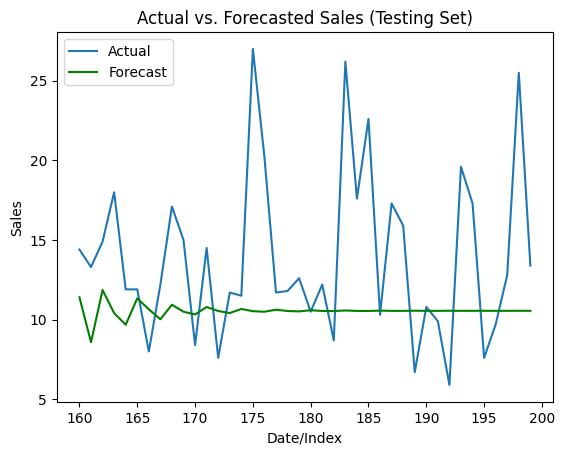

In [10]:
plt.plot(test.index, test['Sales'], label='Actual')
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, forecast, color='green', label='Forecast')
plt.title('Actual vs. Forecasted Sales (Testing Set)')
plt.xlabel('Date/Index')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
mse = ((forecast - test['Sales']) ** 2).mean()
rmse = mse ** 0.5
print("Mean Squared Error:-", mse)
print("Root Mean Squared Error:-", rmse)

Mean Squared Error:- 37.60876105920678
Root Mean Squared Error:- 6.132598230701794
